## Jagan's Notebook for Module 1 Project

* Student name:  **Jagandeep Singh**
* Student pace:  full-time
* Scheduled project review date/time:  07/10/2020
* Instructor name:  Fangfang Lee

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
%matplotlib inline
%run student.ipynb

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


In [2]:
#loading the data files into pandas dataframe
gross = pd.read_csv('data/bom.movie_gross.csv')
imdb_name = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding = 'unicode_escape')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') #No Missing values


In [3]:
# setting and renaming index of tmdb_movies dataset
# tmdb_movies.set_index('Unnamed: 0',inplace = True)
# tmdb_movies.index.rename('index',inplace = True)


In [4]:
#Filled missing values with of gross foriegn value to 0 to convert the type of the column to float
# gross.foreign_gross = gross.foreign_gross.fillna(0)



In [5]:
#This function takes a dataframe and column name as arguments
#It removes '$' and ',' from the column values and convert the column type to float
#This function also divides the number with a million to make the numbers easy to read

# def string_to_float(df,column):
#     df[column] =  df[column].replace({'\$':''}, regex = True)
#     df[column] =  df[column].replace({',':''}, regex = True)
#     df[column] =  round((df[column].astype(float))/1000000, 2)

# # Calling the function on all columns from all datasets to get desired result
# string_to_float(tn_movie_budgets,'production_budget')
# string_to_float(tn_movie_budgets,'domestic_gross')
# string_to_float(tn_movie_budgets,'worldwide_gross')
# string_to_float(gross,'foreign_gross')


In [6]:
#since domestic_gross was already a float dividing it by a million to have same unit of gross throughout the project
# gross.domestic_gross = gross.domestic_gross/1000000


In [7]:
#Creating a new column profit for profit/loss of movies
# tn_movie_budgets['profit'] =  tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']



In [8]:
# top ten movies according to profit
#top_grossing_movies = list(tn_movie_budgets.sort_values(by = 'profit', ascending = True)['movie'])
# find movies that are profitable and not profitable
#tn_movie_budgets.sort_values(by = 'profit', ascending = False)['profit'].hist()
#sequels how good are sequels
#
# tn_movie_budgets.sort_values(by = 'profit', ascending = False).head(10)
# profitable_movies = list(tn_movie_budgets.sort_values(by = 'profit', ascending = False)['movie'].head(50))
# not_profitable_movies = list(tn_movie_budgets.sort_values(by = 'profit')['movie'].head(50))



In [9]:
movie_df.head()

,tconst,movie_title,genres,release_year,release_month,release_date,production_budget,domestic_gross,worldwide_gross,profit,actresses,actors,directors,producers,ratings,nuvotes
0,[tt1640484],Jumping the Broom,"[Drama, Comedy]",2011,5,2011-05-06,7.0,37.295394,38.158601,31.158601,"[[nm1745736, nm0000291, nm0222643]]",[[nm0022306]],[[nm0015328]],"[[nm0537164, nm0249525, nm0415890]]",5.7,9089.0
1,[tt2334649],Fruitvale Station,"[Drama, Biography, Romance]",2013,7,2013-07-12,0.9,16.098998,17.549645,16.649645,"[[nm0246686, nm0818055]]","[[nm0430107, nm0243806]]",[[nm3363032]],"[[nm1341146, nm0001845]]",7.5,68187.0
2,[tt2465146],And So It Goes,"[Drama, Comedy, Romance]",2014,7,2014-07-25,18.0,15.160801,17.920013,-0.079987,"[[nm0000473, nm3606106, nm0661755]]",[[nm0000140]],[[nm0001661]],"[[nm0198941, nm0340112]]",5.8,11597.0
3,[tt8653640],An Ideal Husband,[Comedy],1999,6,1999-06-18,10.7,18.542974,31.341183,20.641183,"[[nm5592690, nm0053384, nm0107988]]","[[nm0002081, nm3456865, nm0662511]]",[[nm9949004]],[],8.3,13.0
4,[tt5117670],Peter Rabbit,"[Animation, Adventure, Comedy]",2018,2,2018-02-09,50.0,115.234093,347.136477,297.136477,[[nm2397981]],"[[nm0179479, nm2417960, nm1727304]]",[[nm0323239]],[[nm0620502]],6.6,27908.0


In [10]:
# Two datasets imdb_title_basics and tn_movie_budgets are merged to get profit and genres together in one table

#merged = pd.merge(imdb_title_basics[['tconst', 'start_year', 'runtime_minutes', 'genres','primary_title']], tn_movie_budgets[['release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross', 'profit']], left_on = 'primary_title', right_on = 'movie', how='inner')
# merged.drop(columns=['movie'], inplace = True)


In [11]:
#Merging gross and tn_movie_budgets to get profit and studios in same table
#profit_studio = pd.merge(gross[['title', 'studio', 'year']], tn_movie_budgets[['release_date', 'movie', 'profit']], left_on = 'title', right_on = 'movie', how='inner')
merged = pd.merge(movie_df, gross[['title', 'studio']], left_on = 'movie_title', right_on = 'title', how='left')
merged.drop(columns=['title'], inplace = True)

In [12]:
merged.head()
# merged.drop(columns=['year'], inplace = True)
# merged.sort_values(by = 'profit', ascending = False).head()



,tconst,movie_title,genres,release_year,release_month,release_date,production_budget,domestic_gross,worldwide_gross,profit,actresses,actors,directors,producers,ratings,nuvotes,studio
0,[tt1640484],Jumping the Broom,"[Drama, Comedy]",2011,5,2011-05-06,7.0,37.295394,38.158601,31.158601,"[[nm1745736, nm0000291, nm0222643]]",[[nm0022306]],[[nm0015328]],"[[nm0537164, nm0249525, nm0415890]]",5.7,9089.0,TriS
1,[tt2334649],Fruitvale Station,"[Drama, Biography, Romance]",2013,7,2013-07-12,0.9,16.098998,17.549645,16.649645,"[[nm0246686, nm0818055]]","[[nm0430107, nm0243806]]",[[nm3363032]],"[[nm1341146, nm0001845]]",7.5,68187.0,Wein.
2,[tt2465146],And So It Goes,"[Drama, Comedy, Romance]",2014,7,2014-07-25,18.0,15.160801,17.920013,-0.079987,"[[nm0000473, nm3606106, nm0661755]]",[[nm0000140]],[[nm0001661]],"[[nm0198941, nm0340112]]",5.8,11597.0,CE
3,[tt8653640],An Ideal Husband,[Comedy],1999,6,1999-06-18,10.7,18.542974,31.341183,20.641183,"[[nm5592690, nm0053384, nm0107988]]","[[nm0002081, nm3456865, nm0662511]]",[[nm9949004]],[],8.3,13.0,NaN
4,[tt5117670],Peter Rabbit,"[Animation, Adventure, Comedy]",2018,2,2018-02-09,50.0,115.234093,347.136477,297.136477,[[nm2397981]],"[[nm0179479, nm2417960, nm1727304]]",[[nm0323239]],[[nm0620502]],6.6,27908.0,Sony


In [13]:
#Merging our table with imdb_title_crew to get the crew for each movie in same table
# merged = pd.merge(merged, imdb_title_crew, on = 'tconst', how='left')


In [14]:
# merged.sort_values(by = 'profit', ascending = False).head()

In [15]:
#Merge to get the ratings in same table
#merged = pd.merge(merged, imdb_title_ratings, on = 'tconst', how = 'left')


In [16]:
#Merge to get the language and popularity in same table
#merged = pd.merge(merged, tmdb_movies[['original_language', 'popularity', 'original_title']],right_on = 'original_title', left_on = 'primary_title', how='left')


In [17]:
#renaming the columns 
#merged.rename(columns={"averagerating": "rating", "numvotes": "votes", "original_language": "language"}, inplace = True)
#merged.drop(columns=['original_title', 'start_year'], inplace = True)



In [18]:
# Modifying column values
#Removing the commas and conerting them to list of strings
#merged['directors'] = merged['directors'].str.split(",") 
#merged['writers'] = merged['writers'].str.split(",") 
#merged['genres'] = merged['genres'].str.split(",") 

In [19]:
#Removing duplicated rows
#  merged.drop_duplicates(subset = 'title')
list(imdb_name.loc[imdb_name.nconst == 'nm0061671' ,'primary_name'])[0]

'Mary Ellen Bauder'

In [20]:
#Getting director names from imdb name and putting them in the columns
# This function looks through the imdb_name dataset and find the corresponding primary name for identifiers
def get_names(lis):
    li = []
    if not isinstance(lis, float):
        for item in lis:
            li.append(list(imdb_name.loc[imdb_name.nconst == item[0] ,'primary_name'])[0])
    return li
    
merged['directors'] = merged['directors'].apply(get_names)
merged['actors'] = merged['actors'].apply(get_names)
merged['actresses'] = merged['actresses'].apply(get_names)
merged['producers'] = merged['producers'].apply(get_names)

In [21]:
merged.sort_values(by = 'profit', ascending = False).head(10)


,tconst,movie_title,genres,release_year,release_month,release_date,production_budget,domestic_gross,worldwide_gross,profit,actresses,actors,directors,producers,ratings,nuvotes,studio
130,[tt1775309],Avatar,[Horror],2009,12,2009-12-18,425.0,760.507625,2776.345279,2351.345279,[Mizuki Sashide],[],[Atsushi Wada],[],6.1,43.0,NaN
267,"[tt2495766, tt8852130]",Titanic,"[Family, Adventure]",1997,12,1997-12-19,200.0,659.363944,2208.208395,2008.208395,"[Eliza Jones, Kamal Khangura]","[Stuart Moore, Raj Singh Jhinger]",[Ravi Punj],[Baljinder Singh],6.2,20.0,NaN
1546,[tt4154756],Avengers: Infinity War,"[Adventure, Action, Sci-Fi]",2018,4,2018-04-27,300.0,678.815482,2048.134200,1748.134200,[],[Robert Downey Jr.],[Anthony Russo],[],8.5,670926.0,BV
566,[tt0369610],Jurassic World,"[Adventure, Action, Sci-Fi]",2015,6,2015-06-12,215.0,652.270625,1648.854864,1433.854864,[Bryce Dallas Howard],[Chris Pratt],[Colin Trevorrow],[Patrick Crowley],7.0,539338.0,Uni.
1021,[tt2820852],Furious 7,"[Thriller, Action, Crime]",2015,4,2015-04-03,190.0,353.007020,1518.722794,1328.722794,[],[Vin Diesel],[James Wan],[Michael Fottrell],7.2,335074.0,Uni.
2090,[tt0848228],The Avengers,"[Adventure, Action, Sci-Fi]",2012,5,2012-05-04,225.0,623.279547,1517.935897,1292.935897,[Scarlett Johansson],[Robert Downey Jr.],[Joss Whedon],[Kevin Feige],8.1,1183655.0,NaN
683,[tt1825683],Black Panther,"[Adventure, Action, Sci-Fi]",2018,2,2018-02-16,200.0,700.059566,1348.258224,1148.258224,[Lupita Nyong'o],[Chadwick Boseman],[Ryan Coogler],[Kevin Feige],7.3,516148.0,BV
2236,[tt4881806],Jurassic World: Fallen Kingdom,"[Adventure, Action, Sci-Fi]",2018,6,2018-06-22,170.0,417.719760,1305.772799,1135.772799,[Bryce Dallas Howard],[Chris Pratt],[J.A. Bayona],[Patrick Crowley],6.2,219125.0,Uni.
992,"[tt1323045, tt1611845, tt2294629]",Frozen,"[Drama, Animation, Comedy, Adventure, Sport, F...",2013,11,2013-11-22,150.0,400.738009,1272.469910,1122.469910,"[Emma Bell, Lan Wei, Kristen Bell]","[Shawn Ashmore, Aarif Rahman, Jonathan Groff]","[Adam Green, Chi-kin Kwok, Chris Buck]","[Peter Block, Sinn Gi Joseph Chan, Peter Del V...",7.5,516998.0,BV
779,"[tt2316801, tt2771200, tt9173998]",Beauty and the Beast,"[Drama, Family, Musical, Fantasy, Romance]",2017,3,2017-03-17,160.0,504.014165,1259.199706,1099.199706,"[Léa Seydoux, Emma Watson, Angelica Serrano]","[Vincent Cassel, Dan Stevens, Caye Duran]","[Christophe Gans, Bill Condon, Marilyn Barnes]",[Richard Grandpierre],7.2,238325.0,NaN


In [22]:
#merged['ratings'].fillna('NA', inplace = True)

In [23]:
#converting release date to pandas date format


In [24]:
#Making a new column for month for analysis
#merged['release_month'] = merged.release_date.dt.month


In [25]:
#actors.rename(columns={"nconst": "actor"}, inplace = True)

In [26]:
#merged = pd.merge(merged, actors, on = 'tconst', how='inner')
#max(list(merged['ratings']) 


In [87]:
#Binning rating and creating another column
bins = [2, 4, 6, 8, 10]
merged['binned_rating'] = pd.cut(merged['ratings'], bins)


In [94]:
# Top 100 and bottom 100 profitable movies
top_100 = merged.sort_values(by = 'profit', ascending = False).head(100)
bottom_100 = merged.sort_values(by = 'profit').head(100)

In [95]:
top_20 = merged.sort_values(by = 'profit', ascending = False).head(20)
bottom_20 = merged.sort_values(by = 'profit').head(20)

In [96]:
# Genres of Top 100 Profitable movies
top_100_genres = list(top_100.genres)
cleanedList = [x for x in top_100.genres if ((str(x) != 'nan') & (str(x) != ''))]
flat_list = [item for sublist in cleanedList for item in sublist]
top_genre = list(set(flat_list))
top_genre.remove("")
top_genre

['Documentary',
 'Music',
 'Sport',
 'Crime',
 'Musical',
 'Fantasy',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Mystery',
 'Biography',
 'Romance',
 'Drama',
 'Horror',
 'Adventure',
 'Sci-Fi']

In [97]:
# # Genres of Bottom 100 Profitable movies
# bottom_100_genres = list(bottom_100.genres)
# flat_list = [item for sublist in bottom_100_genres for item in sublist]
# li = []
# for item in flat_list:
#     if not isinstance(item, float):
#         li.append(item.split(","))
# flat_list = [item for sublist in li for item in sublist]
# bottom_genre = list(set(flat_list))
# bottom_genre

# Genres of Bottom 100 Profitable movies
bottom_100_genres = list(bottom_100.genres)
cleanedList = [x for x in bottom_100.genres if str(x) != 'nan']
flat_list = [item for sublist in cleanedList for item in sublist]
bottom_genre = list(set(flat_list))
bottom_genre.remove("")
bottom_genre

['Documentary',
 'History',
 'Music',
 'War',
 'Sport',
 'Crime',
 'Musical',
 'Fantasy',
 'Thriller',
 'Western',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Mystery',
 'Biography',
 'Romance',
 'Drama',
 'Horror',
 'Adventure',
 'Sci-Fi']

In [49]:
# Directors of top_20 Profitable movies
top_100_directors = list(top_100.directors)
flat_list = [item for sublist in top_100_directors for item in sublist]
top_directors = set(flat_list)
list(top_directors)[0:10]

['James Fotopoulos',
 'Tarô Ohtani',
 'Rob Marshall',
 'Marilyn Barnes',
 'Bill Condon',
 'Ridley Scott',
 'Ruben Fleischer',
 'James Wan',
 'Russell Davidson',
 'Taika Waititi']

In [ ]:
#merged[['production_budget', 'profit']].corr()

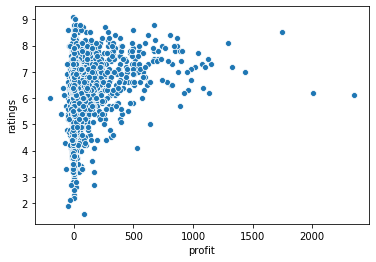

In [77]:
#rating and profit graph
sns.scatterplot('profit', 'ratings', data=merged[['ratings', 'profit']])


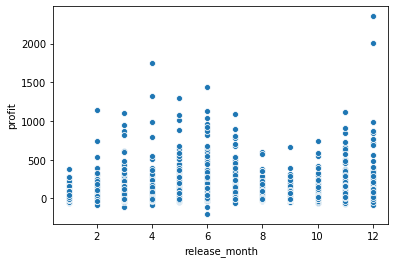

In [80]:
sns.scatterplot(  'release_month','profit', data=merged[['release_month', 'profit']], )



In [53]:
#Average profit of movies grouped by release month
merged.sort_values(by = 'profit', ascending = False).head(50).groupby('release_month')['profit'].mean()

release_month
2      945.641908
3      935.545496
4     1212.389452
5      989.498420
6      915.015627
7      824.599824
9      662.457969
10     737.628605
11     819.400906
12    1155.374426
Name: profit, dtype: float64

In [104]:
#Average profit of movies grouped by rating
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].mean()


binned_rating
(2, 4]       9.397614
(4, 6]      36.625659
(6, 8]      96.121967
(8, 10]    194.508071
Name: profit, dtype: float64

In [101]:
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].median()

binned_rating
(2, 4]     -0.500000
(4, 6]      0.546865
(6, 8]     18.996794
(8, 10]    62.227619
Name: profit, dtype: float64

In [55]:
# Studios and profit
merged.groupby('studio')['profit'].mean().sort_values(ascending=False).head(20)

studio
P/DW        374.402760
BV          338.152749
GrtIndia    233.502914
Uni.        179.309765
Sony        175.228888
Fox         174.280348
WB (NL)     172.763899
WB          143.351010
Par.        133.566798
Strand      129.278214
MGM          96.779636
UTV          95.011597
Sum.         85.736472
LGF          84.267609
MBox         81.036163
SGem         66.873883
LG/S         65.925054
TriS         65.005914
W/Dim.       60.164192
Wein.        49.793587
Name: profit, dtype: float64

In [56]:
#Average profit of bottom 100 movies grouped by rating
merged.sort_values(by = 'profit').head(100).groupby('binned_rating')['profit'].mean()

binned_rating
(1, 2]    -44.926294
(2, 3]    -29.831168
(3, 4]    -64.483721
(4, 5]    -35.463724
(5, 6]    -42.532964
(6, 7]    -35.174010
(7, 8]    -32.946576
(8, 9]    -44.373310
(9, 10]          NaN
Name: profit, dtype: float64

In [57]:
def percentage_of_genre(df,genre):
    count = 0
    for item in df.genres:
        if not isinstance(item, float):
            if genre in item:
                count += 1
    return count

print("Percentage of Action Movies in top_100 " + str(percentage_of_genre(top_100, 'Action')) +"%" )
print("Percentage of Adventure Movies in top_100 " + str(percentage_of_genre(top_100, 'Adventure')) +"%" )

Percentage of Action Movies in top_100 55%
Percentage of Adventure Movies in top_100 77%


# Percentage of genres in Top 100 Profitable Movies


In [58]:
#percentage of genre in top movies
for item in top_genre:
    print(item + " Movies " + str(percentage_of_genre(top_100, item)) +"%" )

Documentary Movies 2%
Music Movies 2%
Sport Movies 2%
Crime Movies 3%
Musical Movies 3%
Fantasy Movies 21%
Thriller Movies 11%
Animation Movies 24%
Comedy Movies 29%
Family Movies 13%
Action Movies 55%
Mystery Movies 1%
Biography Movies 2%
Romance Movies 3%
Drama Movies 16%
Horror Movies 2%
Adventure Movies 77%
Sci-Fi Movies 31%


# Percentage of genres in Bottom 100 Profitable Movies


In [59]:
#percentage of genre in Bottom movies
for item in bottom_genre:
    print(item + " Movies " + str(percentage_of_genre(bottom_100, item)) +"%" )

Documentary Movies 15%
History Movies 7%
Music Movies 3%
War Movies 3%
Sport Movies 3%
Crime Movies 23%
Musical Movies 1%
Fantasy Movies 9%
Thriller Movies 19%
Western Movies 3%
Animation Movies 8%
Comedy Movies 31%
Family Movies 10%
Action Movies 41%
Mystery Movies 7%
Biography Movies 15%
Romance Movies 11%
Drama Movies 49%
Horror Movies 6%
Adventure Movies 25%
Sci-Fi Movies 6%


In [60]:
merged.head(5)

,tconst,movie_title,genres,release_year,release_month,release_date,production_budget,domestic_gross,worldwide_gross,profit,actresses,actors,directors,producers,ratings,nuvotes,studio,binned_rating
0,[tt1640484],Jumping the Broom,"[Drama, Comedy]",2011,5,2011-05-06,7.0,37.295394,38.158601,31.158601,[Paula Patton],[Laz Alonso],[Salim Akil],[Michael Mahoney],5.7,9089.0,TriS,"(5, 6]"
1,[tt2334649],Fruitvale Station,"[Drama, Biography, Romance]",2013,7,2013-07-12,0.9,16.098998,17.549645,16.649645,[Melonie Diaz],[Michael B. Jordan],[Ryan Coogler],[Nina Yang Bongiovi],7.5,68187.0,Wein.,"(7, 8]"
2,[tt2465146],And So It Goes,"[Drama, Comedy, Romance]",2014,7,2014-07-25,18.0,15.160801,17.920013,-0.079987,[Diane Keaton],[Michael Douglas],[Rob Reiner],[Mark Damon],5.8,11597.0,CE,"(5, 6]"
3,[tt8653640],An Ideal Husband,[Comedy],1999,6,1999-06-18,10.7,18.542974,31.341183,20.641183,[Faith Omole],[Edward Fox],[Jonathan Church],[],8.3,13.0,NaN,"(8, 9]"
4,[tt5117670],Peter Rabbit,"[Animation, Adventure, Comedy]",2018,2,2018-02-09,50.0,115.234093,347.136477,297.136477,[Sia],[James Corden],[Will Gluck],[Zareh Nalbandian],6.6,27908.0,Sony,"(6, 7]"


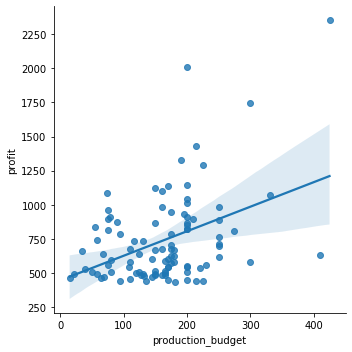

In [70]:
#Production budget and 
sns.lmplot(x='production_budget',y='profit',data = top_100,fit_reg=True) 


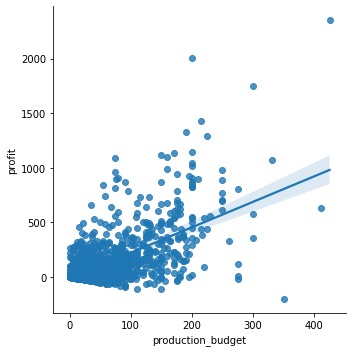

In [71]:
sns.lmplot(x='production_budget',y='profit',data = merged,fit_reg=True) 